### Emergence of the Poisson Distribution
### Incomplete


In [12]:
import matplotlib.pyplot as plt
from matplotlib import animation
import random
import copy #allow for pass by value
from IPython.display import display

In [13]:
random.seed()
#find no. of counts in an interval
def counts(prob_photon, no_trials): #no of counts in an interval
    counts = 0
    for i in range(no_trials):
        x = random.uniform(0,1)
        if x < prob_photon:
            counts += 1
    return counts

In [14]:
#generate the poisson distribution
prob_photon = 3.0e-4 #probability of receiving a photon in interval (p --> 0)
no_trials = 10000 #number of trials per interval (n --> inf)
repeats = 10 #number of intervals

results = [] #counts from each interval
results_sequence = [] #the list of results (for the animation)


for i in range(repeats):
    results.append(counts(prob_photon, no_trials))
    results_sequence.append(copy.copy(results))

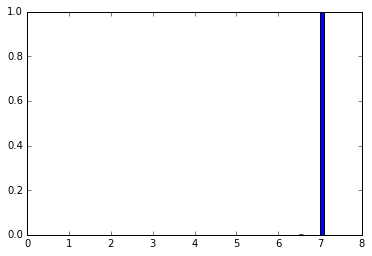

In [15]:
#initialise the histogram
fig = plt.figure()
plt.xlim([0,8])
plt.hist(results_sequence[0])

#animate the histogram
def update_hist(frame_no, results_sequence):
    plt.cla()
    plt.hist(results_sequence[frame_no], align = 'mid', bins = [0, 1, 2, 3, 4, 5, 6, 7, 8])
    plt.xlabel("Counts per interval")
    plt.ylabel("Frequency")
    plt.title("Emergence of the Poisson Distribution")
    plt.xlim([0,8])

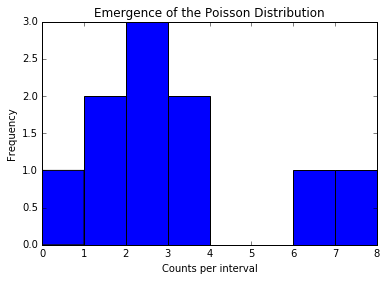

In [16]:
#create video file and save it in a local folder
animation = animation.FuncAnimation(fig, update_hist, repeats, fargs=(results_sequence,), repeat = False)
animation.save('poisson_histogram.mp4', writer = 'ffmpeg',  fps = 20)